In [255]:
from sklearn.datasets import load_iris
from sklearn import tree 

from sklearn.externals.six import StringIO
import pydot
import os.path

%matplotlib inline
import matplotlib.pyplot

In [256]:
# We are classifying attributes of a flower, iris

iris = load_iris()
iris.keys()
iris.target_names #used to access the different classes for the final validation example

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [257]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [258]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


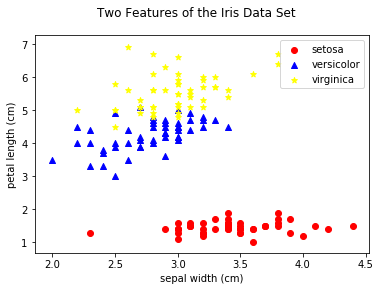

In [259]:
# plotting two attributes, the sepal length and the petal width 
# numbers signify columns

x1_feature = 1
x2_feature = 2

x1 = iris.data[:, x1_feature]
x2 = iris.data[:, x2_feature]

start_type_one = list(iris.target).index(1)
start_type_two = list(iris.target).index(2)

# creating a figure 

fig = matplotlib.pyplot.figure()
fig.suptitle('Two Features of the Iris Data Set')
matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

# plot the input data

scatter_0 = matplotlib.pyplot.scatter(x1[:start_type_one], x2[:start_type_one],
                                     c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x1[start_type_one:start_type_two], x2[start_type_one:start_type_two], 
                                     c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x1[start_type_two:], x2[start_type_two:], 
                                     c="yellow", marker="*", label=iris.target_names[2])

# adding labels

matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2])

# show the plot

matplotlib.pyplot.show()


In [260]:
# Training

model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [261]:
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names,
                    filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/iris_decision_tree.pdf"))

In [262]:
# Exercise Option (Standard Difficulty)

# If the petal length is less than or equal to 2.45 centimeters, if the gini is approximately 0.667, 
# if the amount of samples are 150, if the value is [50, 50, 50], and the class is setosa, then it is
# determined with high probability that it is a setosa iris. 

# If the petal length is not less than or equal to 1.75 centimeters, if the gini is not approximately 0.5,
# if the amount of samples is not 100, if the value is not [0, 50, 50], and the class is clearly not 
# versicolor, then it is determined with high probability that it is a virginica iris. 

# The value array is showing the rgb values for the iris colors. 

# Using different subsets of the input data will change the classification model of the decision tree. 
# The columns were changed to depict sepal width and petal length, and the results depicted a change in 
# the first label at the tip of the decision tree. Rather than listing the “petal width,” the new diagram 
# showed the “petal length,” with a different value in centimeters as length and width are different attributes. 


In [263]:
# Logistic Regression and Generating Data

# The outputs/inputs are numbers between 0 and 1
# The logit constrains these outputs to lie between 0 and 1
# this model can serve as a classifier that outputs values of 
# probability, things can be grouped with great confidence

# logistic regression also relies on parameters to construct a best fit
# the logistic function is also known as the "inverse logit"


In [264]:
import numpy.random # for generating our dataset
from sklearn import linear_model # for fitting our model

# force numpy not to use scientific notation, to make it easier to read the numbers the program prints out
numpy.set_printoptions(suppress=True)

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot

In [265]:
NUM_INPUTS = 50 

# PLANT_A generated data

#PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_HEIGHT = 70.0
#PLANT_A_AVG_WIDTH = 8.0
PLANT_A_AVG_WIDTH = 10.0

# PLANT_B generated data

#PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_HEIGHT = 68.0
#PLANT_B_AVG_WIDTH = 10.0
PLANT_B_AVG_WIDTH = 8.0

# Creating a distribution centered around averages with "numpy.random.normal"

plant_a_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plant_a_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plant_b_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plant_b_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

# 2D Matrix

plant_inputs = list(zip(numpy.append(plant_a_heights, plant_b_heights),
                        numpy.append(plant_a_widths, plant_b_widths)))

# listing type a and b as 1s and 0s

classes = [0]*NUM_INPUTS + [1]*NUM_INPUTS

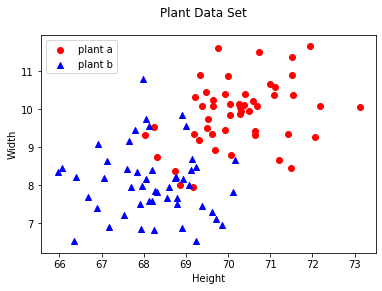

In [266]:
fig = matplotlib.pyplot.figure()
fig.suptitle('Plant Data Set')
matplotlib.pyplot.xlabel('Height')
matplotlib.pyplot.ylabel('Width')

# generating a and b on the graph
a_scatter = matplotlib.pyplot.scatter(plant_a_heights, plant_a_widths, c="red", marker="o", label='plant a')
b_scatter = matplotlib.pyplot.scatter(plant_b_heights, plant_b_widths, c="blue", marker="^", label='plant b')

matplotlib.pyplot.legend(handles=[a_scatter, b_scatter])

matplotlib.pyplot.show()

In [267]:
# adding logistic regression model 

model = linear_model.LogisticRegression()
model.fit(plant_inputs, classes)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

Intercept: [0.41140024]  Coefficients: [[ 0.20701772 -1.64421369]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [268]:
# generating some random values
new_a_height = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT)
new_a_width = numpy.random.normal(loc=PLANT_A_AVG_WIDTH)
new_b_height = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT)
new_b_width = numpy.random.normal(loc=PLANT_B_AVG_WIDTH)

# adding values to a matrix
inputs = [[new_a_height, new_a_width], [new_b_height, new_b_width]]

# Print out the outputs for these new inputs
print('Plant A: {0} {1}'.format(new_a_height, new_a_width))
print('Plant B: {0} {1}'.format(new_b_height, new_b_width))
print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

Plant A: 70.96796962961841 10.51604746871054
Plant B: 66.07704631573336 7.763046072629959
Class predictions: [0 1]
Probabilities:
[[0.89913062 0.10086938]
 [0.20975334 0.79024666]]


In [269]:
# Exercise Option: Standard Difficulty

# In this example, the model gives the expected output because 0 represents
# a and 1 represents b. It is fairly likely that a plant with a height of 
# about 60 is of class 0 which represents plant a

# the probabilities output shows the relative confidence of the prediction 
# of whether or not the plant is a or b. The first probability is less
# confident and represents the confidence of the first plant classified
# as plant a. This may be because of the overall dataset that was graphed
# on the varying distribution, this is data that the computer is able to 
# search through quickly, applying the logistic function. The dataset for
# the second plant, plant b probably had generated data that "favored" the 
# generated data more than the plant b data. 

# The predictions changed considerably. I changed the average heights and widths
# by quite a bit, and the end result showed a change in probability. However, this
# positive uptick isn’t consistent, as the probabilities fluctuate over time, showing
# values as low as 40 percent (or as low as 30 percent) to values as high as  99.8
# percent. This is simply due to the randomly generating data that is set by the program. 

# A negative coefficient implies that there is an overall decrease in the slope of the
# clustered graph. I would expect the probabilities to be relatively low compared to
# the other dataset. 

In [270]:
# Validation - how well did my model perform? 
# Classification validation? 
# unsupervised classification - clustering
# ratio of points in correct category - accuracy
# 
# true positive = in class, correctly guessed
# false positive = not in class, incorrectly guessed that it was
# true negative = correctly guessed not in class
# false negative = incorrectly guessed not in class, when it was
#
# Precision (TP/(TP+FP)) - how often points in this class are right
# Recall (TP/(TP+FN)) - what fraction of points correctly identified
# F-measure - combination of precision and recall "harmonic mean" (2 * ((P*R)/(P+R)))
# 
# More Notes: 
# Precision-Recall Example: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
# I'll try to alter this code and test this example

In [271]:
#Precision-Recall Example (without many alterations)

import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [272]:
# This attempts to tell different classes apart from one another. 
# I test how precise this differentiation is

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

# loading the iris data set 
iris = datasets.load_iris() 
# given data
X = iris.data
# desired target
y = iris.target

# Setting a random state to add noise
random_state = np.random.RandomState(0)
# adding noise and altering the shape of the graph
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# train_test_split - this splits arrays into random "train" and "test" sets
# this is only performed for the first two classes of the dataset

# testing any other classes or combinations of classes raises errors because there is either 
# a syntax error, the function works only with two classes, or the function only works with 
# binary indexes of 0 and 1, and not with 1 and 2. This is what was tested, and is shown in the
# bottom cell of the notebook

X_train, X_test, y_train, y_test = train_test_split(X[y<2], y[y<2],
                                                   test_size=.5,
                                                   random_state=random_state)

# creating a classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [273]:
print(y)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [274]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [275]:
print(X)

[[ 5.1         3.5         1.4        ... -1.07709907 -0.4246633
  -0.8299646 ]
 [ 4.9         3.          1.4        ...  1.4121517  -1.38043075
  -0.53591456]
 [ 4.7         3.2         1.3        ...  0.65880214 -0.59691711
  -0.22295918]
 ...
 [ 6.5         3.          5.2        ... -0.5154906  -0.12964864
  -0.5092809 ]
 [ 6.2         3.4         5.4        ...  1.42147798 -0.61336209
  -0.34432031]
 [ 5.9         3.          5.1        ...  2.53170549 -0.03572203
   0.17320019]]


In [276]:
# This will compute the precision score
# based on the y_test and y_score obtained by the previous blocks
# train_test_split altered y_train and y_test randomly

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print("Average precision-recall score: {0:0.2f}".format(average_precision))

Average precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

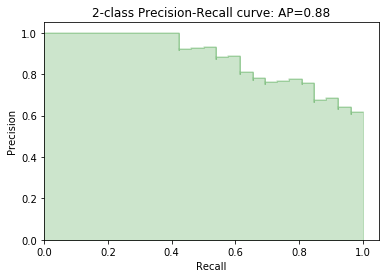

In [277]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

# precision and recall variables are set to the precision_recall_curve generated by the library
# again, the y_test and y_score values are used as parameters
precision, recall, _ = precision_recall_curve(y_test, y_score)

# plotting the precision-recall curve
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='g', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# testing classes 2 and 3 isn't very practical as of now, the computer only recognizes 
# 0 and 1 indexes because they are binary, and using 1 and 2 indexes isn't binary

In [278]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# testing again
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# ....
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

In [279]:
# average precision score using multi-label settings

In [280]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# process repeated for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# "micro-averages" 
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.43


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.43')

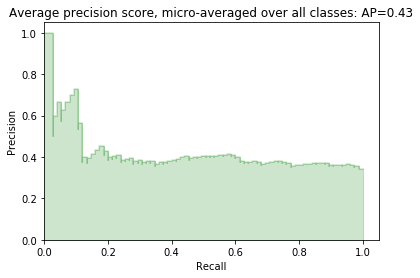

In [281]:
# plotting the figure which shows the precision score graphically
plt.figure()
plt.step(recall['micro'], precision['micro'], color='g', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='g',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

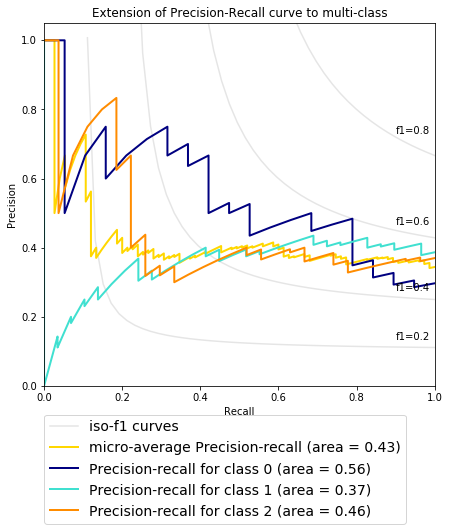

In [282]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [283]:
# plotting micro-average and precision-recall

In [285]:
# This attempts to tell different classes apart from one another. 
# I test how precise this differentiation is

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

# loading the iris data set 
iris = datasets.load_iris() 
# given data
X = iris.data
# desired target
y = iris.target

# Setting a random state to add noise
random_state = np.random.RandomState(0)
# adding noise and altering the shape of the graph
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# train_test_split - this splits arrays into random "train" and "test" sets
# this is only performed for the first two classes of the dataset

# testing any other classes or combinations of classes raises errors because there is either 
# a syntax error, the function works only with two classes, or the function only works with 
# binary indexes of 0 and 1, and not with 1 and 2. This is what was tested, and is shown in the
# bottom cell of the notebook

X_train, X_test, y_train, y_test = train_test_split(X[y>0], y[y>0],
                                                   test_size=.5,
                                                   random_state=random_state)

# creating a classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [286]:
# This will compute the precision score
# based on the y_test and y_score obtained by the previous blocks
# train_test_split altered y_train and y_test randomly

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print("Average precision-recall score: {0:0.2f}".format(average_precision))

Average precision-recall score: 0.44


In [287]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

# precision and recall variables are set to the precision_recall_curve generated by the library
# again, the y_test and y_score values are used as parameters
precision, recall, _ = precision_recall_curve(y_test, y_score)

# plotting the precision-recall curve
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='g', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# testing classes 2 and 3 isn't very practical as of now, the computer only recognizes 
# 0 and 1 indexes because they are binary, and using 1 and 2 indexes isn't binary

ValueError: Data is not binary and pos_label is not specified

In [288]:
# the above error shows that the "data is not binary" as it's dealing with indexes of 1 and 2

In [289]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [290]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
